<a href="https://colab.research.google.com/github/chandankumar3it/bank-loan-eda-analysis/blob/main/Bank_Loan_Case_Study_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Required Libraries

In [ ]:
#Importing all the important libraries like numpy. pandas, matlplolib, and warnings to keep notebook clean
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# To suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#notebook setting to display all the rowns and columns to have better clearity on the data.

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

# Work on Dataset - application_data.csv

## Reading and Understanding the Dataset

#### Importing the dataset





In [ ]:
# importing application_data.csv

appData_df = pd.read_csv("application_data.csv")

#### Understanding the dataset

In [ ]:
appData_df.head()

In [ ]:
#Checking the rows and columns of the raw dataset

appData_df.shape

(307511, 122)

In [ ]:
#Checking information of all the columns like data types
appData_df.info("all")

In [ ]:
# Checking the numeric variables of the dataframes
appData_df.describe()

**INSIGHT**


*   There are 122 columns and 307511 rows.
*   There columns having negative, postive values which includes days. It is required to fix.
*   There are columns with very hight values, columns related to Amount. Standardising is required









## Data Cleaning & Manipulation

### Data Quality Check - Missing Values

In [20]:
#checking how many null values are present in each of the columns

#creating a function to find null values for the dataframe
def missing_values(appData_df):
    return 100*appData_df.isnull().mean().sort_values(ascending = False)


In [ ]:
# Missing values columns

null_col = missing_values(appData_df)
null_col

**INSIGHT**


### Remove the columns with Missing values more than 40%

In [ ]:
#creating a variable missing_value_col for storing null columns having missing values more than 40%

missing_value_col_40 = null_col[null_col>40]
missing_value_col_40

In [ ]:
#Revieving missing_value_col

print(missing_value_col_40)
print()
print("Number of columns having missing values more than 40% :",len(missing_value_col_40))

**INSIGHT**

* There are 49 columns having null values more than 40% which are related to different area sizes on apartment owned/rented by the loan applicant

In [ ]:
# We will drop all these columns
missing_value_col_40.index

In [ ]:
# Drop all the columns having missing values more than 40%

appData_df.drop(columns = missing_value_col_40.index, inplace = True)

In [ ]:
appData_df.shape

(307511, 73)

*** After after dropping 49 columns we have left with 73 columns**

### Dealing with null values less than 15%

In [ ]:
# Columns with null values < 15%

missing_value_col_15 = null_col[null_col<15]
print("Number of columns with null value less than 15% :", len(missing_value_col_15.index))
print(missing_value_col_15)


*   There are 71 columns which have less than 15% missing values



In [ ]:
missing_value_col_15.index

In [ ]:
# Reviewing the columns
print(missing_value_col_15)
print()
print("Number of columns having missing values less than 15% :",len(missing_value_col_15))

### Analyse & Removing Unneccsary Columns

In [ ]:
# Identifying unique values with columns < 15%

appData_df[missing_value_col_15.index].nunique().sort_values(ascending=False)

* **From the above we can see that first two (EXT_SOURCE_2, AMT_GOODS_PRICE) are continous variables and remaining are catagorical variables**

In [ ]:
# Continous varibale - EXT_SOURCE_2

sns.boxplot(appData_df['EXT_SOURCE_2'])
plt.show()

In [ ]:
# Continous varibale - AMT_GOODS_PRICE

sns.boxplot(appData_df['AMT_GOODS_PRICE'])
plt.show()

Observation from Boxplots:
*   For 'EXT_SOURCE_2' no outliers present. So data is rightly present.
*   For 'AMT_GOODS_PRICE' outlier present in the data. So need to impute with median.



In [ ]:
for col in appData_df.columns:
    print(col)

### Removing the un-used columns and analysis

In [ ]:
# Un-used columns in data set
unused_col = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','FLAG_PHONE', 'FLAG_EMAIL',
          'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
          'REGION_RATING_CLIENT_W_CITY','FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4',
          'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10',
          'FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
          'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
          'FLAG_DOCUMENT_21','EXT_SOURCE_2','EXT_SOURCE_3']

In [ ]:
# Droping un-used columns
appData_df.drop(labels = unused_col, axis=1, inplace = True)

In [ ]:
appData_df.head()

In [ ]:
appData_df.shape

(307511, 42)

## Imputing values

In [ ]:
# Imputing the value'XNA' which means not available for the column 'CODE_GENDER'

appData_df.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

* XNA values are very low and Female is the majority. So lets replace XNA with gender 'F'

In [ ]:
# Replacing 'XNA' to 'F' for 'CODE_GENDER'

appData_df.loc[appData_df.CODE_GENDER == 'XNA', 'CODE_GENDER'] = 'F'

In [ ]:
# Reviewing the 'CODE_GENDER'
appData_df.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [ ]:
# checking the CODE_GENDER

appData_df.CODE_GENDER.head(10)

In [ ]:
appData_df["CODE_GENDER"].isnull().sum()

0

### Imputing for "OCCUPATION_TYPE" column

In [ ]:
#Percentage of each category present in "OCCUPATION_TYPE"

appData_df["OCCUPATION_TYPE"].value_counts(normalize=True)*100

In [ ]:
# Checking null value in column OCCUPATION_TYPE
appData_df["OCCUPATION_TYPE"].isnull().sum()

96391

* There are total 96391 records/rows having null value in columns OCCUPATION_TYPE

**Insight:**

* From above it looks like this columnn is categorical one and have missing values.
* To fix this we will impute another category as "Unknown" for the missing values.

In [ ]:
# imputing null values with "Unknown"

appData_df["OCCUPATION_TYPE"] = appData_df["OCCUPATION_TYPE"].fillna("Unknown")

In [ ]:
# Reviewing the null values in column OCCUPATION_TYPE
appData_df["OCCUPATION_TYPE"].isnull().sum()

0

In [ ]:
# Plotting a percentage graph having each category of "OCCUPATION_TYPE"

plt.figure(figsize = [12,7])
(appData_df["OCCUPATION_TYPE"].value_counts()).plot.barh(color= "orange",width = .8)
plt.title("Type of Occupations", fontdict={"fontsize":20}, pad =20)
plt.show()

* **Highest percentage of values belongs to Unknown group and Secons belongs to Laborers**



In [ ]:
appData_df.info("all")

### **Now let's move to other 6 columns :**
**"AMT_REQ_CREDIT_BUREAU_YEAR", "AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_HOUR"**

In [ ]:
appData_df[["AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_WEEK",
"AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_HOUR"]].describe()

,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,1.899974,0.265474,0.267395,0.034362,0.007000,0.006402
std,1.869295,0.794056,0.916002,0.204685,0.110757,0.083849
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,261.000000,27.000000,8.000000,9.000000,4.000000


* **These above columns represent number of enquries made for the customer(which should be discrete and not continous).**
* **From above describe results we see that all values are numerical and can conclude that for imputing missing we should not use mean as it is in decimal form, hence for imputing purpose we will use median for all these columns.**

In [ ]:
#creating "amt_credit" variable having these columns "AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_WEEK",
#"AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_HOUR"

amt_req_credit = ["AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_WEEK",
"AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_HOUR"]

In [ ]:
#filling missing values with median values

appData_df.fillna(appData_df[amt_req_credit].median(),inplace = True)

In [ ]:
missing_values(appData_df).head(10)

**Still there some missing value coloumns but we will not impute them as the missing value count very less.**

In [ ]:
# Casting variable into numeric in the dataset

numerical_columns=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE',
                 'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START',
                 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
                'DAYS_LAST_PHONE_CHANGE']

In [ ]:
appData_df[numerical_columns] = appData_df[numerical_columns].apply(pd.to_numeric)
appData_df.head(10)

In [ ]:
appData_df.shape

(307511, 42)

## **Standardising values**

In [ ]:
appData_df.describe()

**Insights:**

From above describe result we can see that

* Columns DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, DAYS_LAST_PHONE_CHANGE which counts days have negative values thus will correct those values
* Convert DAYS_BIRTH to AGE in years , DAYS_EMPLOYED to YEARS EMPLOYED
* Columns AMT_INCOME_TOTAL, AMT_CREDIT, AMT_GOODS_PRICE have very high values, thus will make these numerical columns in categorical columns for better understanding.



### **Dealing with columns :**
**"DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "DAYS_LAST_PHONE_CHANGE"**


**Columns DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, DAYS_LAST_PHONE_CHANGE which counts days have negative values. thus will correct those values**


In [ ]:
# creating "days_col" varibale to store all days columns
days_col = ["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "DAYS_LAST_PHONE_CHANGE"]

appData_df[days_col].describe()

**From above, we get that days are in negative that is not usual, so to correct it we use absolute function as below**

In [ ]:
#using abs() function to correct the days values

appData_df[days_col]= abs(appData_df[days_col])

In [ ]:
# Reviewing correct data

appData_df[days_col].describe()

**Now convert DAYS_BIRTH, DAYS_EMPLOYED columns in terms of Years and binning years for better understanding, that is adding two more categorical column**

In [ ]:
appData_df["AGE"] = appData_df["DAYS_BIRTH"]/365
bins = [0,20,25,30,35,40,45,50,55,60,100]
slots = ["0-20","20-25","25-30","30-35","35-40","40-45","45-50","50-55","55-60","60 Above"]

appData_df["AGE_GROUP"] = pd.cut(appData_df["AGE"], bins=bins, labels=slots)

In [ ]:
appData_df["AGE_GROUP"].value_counts(normalize= True)*100

In [ ]:
#creating column "EMPLOYEMENT_YEARS" from "DAYS_EMPLOYED"

appData_df["YEARS_EMPLOYED"] = appData_df["DAYS_EMPLOYED"]/365
bins = [0,5,10,15,20,25,30,50]
slots = ["0-5","5-10","10-15","15-20","20-25","25-30","30 Above"]

appData_df["EMPLOYEMENT_YEARS"] = pd.cut(appData_df["YEARS_EMPLOYED"], bins=bins, labels=slots)

In [ ]:
appData_df["EMPLOYEMENT_YEARS"].value_counts(normalize= True)*100

**Taking care of Columns: AMT_INCOME_TOTAL, AMT_CREDIT, AMT_GOODS_PRICE**

In [ ]:
# Binning Numerical Columns to create a categorical column

# Creating bins for AMT_INCOME_TOTAL in term of Lakhs
appData_df['AMT_INCOME_TOTAL']=appData_df['AMT_INCOME_TOTAL']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slot = ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L Above']

appData_df['AMT_INCOME_RANGE']=pd.cut(appData_df['AMT_INCOME_TOTAL'],bins,labels=slot)

In [ ]:
appData_df["AMT_INCOME_RANGE"].value_counts(normalize = True)*100

In [ ]:
# Creating bins for AMT_CREDIT in term of Lakhs
appData_df['AMT_CREDIT']=appData_df['AMT_CREDIT']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slots = ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L Above']

appData_df['AMT_CREDIT_RANGE']=pd.cut(appData_df['AMT_CREDIT'],bins=bins,labels=slots)

In [ ]:
appData_df["AMT_CREDIT_RANGE"].value_counts(normalize = True)*100

In [ ]:
# Creating bins for AMT_GOODS_PRICE in term of Lakhs
appData_df['AMT_GOODS_PRICE']=appData_df['AMT_GOODS_PRICE']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slots = ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L Above']

appData_df['AMT_GOODS_PRICE_RANGE']=pd.cut(appData_df['AMT_GOODS_PRICE'],bins=bins,labels=slots)

In [ ]:
appData_df["AMT_GOODS_PRICE_RANGE"].value_counts(normalize = True)*100

## Identifying Outliers

In [ ]:
appData_df.describe()

**INSIGHT**
* From above we could find all the columns those wo have high difference between max and 75 percentile and the ones which makes no sense having max value to be so high are captured below:

In [ ]:
outlier_col = ["CNT_CHILDREN","AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE",
               "DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION"]

In [ ]:
# Function for outliers/distribution of -> outlier_col variable - boxplot
for col in outlier_col:
  plt.figure(figsize = [5,4])
  plt.title(col)
  sns.boxplot(y = appData_df[col])
  plt.show()


**Insight:**

**It can be seen that in current application data**

* **CNT_CHILDREN, AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE, have some number of outliers.**
* **AMT_INCOME_TOTAL has huge number of outliers which indicate that few of the loan applicants have very high income when compared to the others.**
* **DAYS_BIRTH has no outliers which means the data is reliable.**
* **DAYS_EMPLOYED has outlier values around 350000(days) which is around 958 years which is impossible and hence this has to be incorrect entry.**

In [ ]:
appData_df.nunique().sort_values()

In [ ]:
#Checking the number of unique values each column possess to identify categorical columns

appData_df.info()

### Converting Desired columns from Object to categorical column

In [ ]:
appData_df.columns

In [ ]:
#from the list, we have taken out the desired columns for conversion

categorical_columns = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
                       'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START',
                       'ORGANIZATION_TYPE','FLAG_OWN_REALTY','LIVE_CITY_NOT_WORK_CITY',
                       'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION',
                       'LIVE_REGION_NOT_WORK_REGION','WEEKDAY_APPR_PROCESS_START',
                       'CNT_CHILDREN']

In [ ]:
for col in categorical_columns:
    appData_df[col] = pd.Categorical(appData_df[col])

In [ ]:
len(categorical_columns) # Converting total of 18 columns to categorical one

18

In [ ]:
appData_df.info()

**Insight**

* **After imputing we have 49 columns and we will do Data Analysis on these columns.**

# Work on dataset - previous_application.csv

In [15]:
# importing previous_application.csv

prev_appl = pd.read_csv("previous_application.csv")

In [ ]:
prev_appl.head()

In [17]:
#Checking rows and columns of the raw data
prev_appl.shape

(1670214, 37)

In [ ]:
#Checking information of all the columns like data types
prev_appl.info()

* **There are 37 columns having various data types like object, int, float and 1670214 rows.**

In [ ]:
# Checking the numeric variables of the dataframes
prev_appl.describe()

**Insight**

* **There are 37 columns and 1670214 rows.**
* **There are columns having negative, postive values which includes days, will fix it**

In [ ]:
#checking how many null values are present in each of the columns in percentage
missing_values(prev_appl)

In [23]:
#creating a variable prev_null_col_50 for storing null columns having missing values more than 50%

prev_null_col_50 = missing_values(prev_appl)[missing_values(prev_appl)>50]

In [24]:
prev_null_col_50

RATE_INTEREST_PRIVILEGED    99.643698
RATE_INTEREST_PRIMARY       99.643698
AMT_DOWN_PAYMENT            53.636480
RATE_DOWN_PAYMENT           53.636480
dtype: float64

* **There only 4 columns with missing valus more than 50%**

In [25]:
#dropping null columns having missing values more than 50%

prev_appl.drop(columns = prev_null_col_50.index, inplace = True)

In [26]:
#creating a variable prev_null_col_15 for storing null columns having missing values more than 15%

prev_null_col_15 = missing_values(prev_appl)[missing_values(prev_appl)>15]

In [27]:
prev_null_col_15

NAME_TYPE_SUITE              49.119754
DAYS_FIRST_DRAWING           40.298129
DAYS_TERMINATION             40.298129
DAYS_LAST_DUE                40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_FIRST_DUE               40.298129
NFLAG_INSURED_ON_APPROVAL    40.298129
AMT_GOODS_PRICE              23.081773
AMT_ANNUITY                  22.286665
CNT_PAYMENT                  22.286366
dtype: float64

In [29]:
prev_appl[prev_null_col_15.index]

In [30]:
prev_appl.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'], dtype='object')

In [31]:
# Listing down unused columns
unused_prev_appl = ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']

prev_appl.drop(unused_prev_appl,axis =1, inplace = True)

prev_appl.shape

(1670214, 29)

In [32]:
# Imputing values "Unknown" as this a categorical column
prev_appl["NAME_TYPE_SUITE"] = prev_appl["NAME_TYPE_SUITE"].fillna("Unknown")

missing_values(prev_appl)

NFLAG_INSURED_ON_APPROVAL    40.298129
DAYS_TERMINATION             40.298129
DAYS_LAST_DUE                40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_FIRST_DUE               40.298129
DAYS_FIRST_DRAWING           40.298129
AMT_GOODS_PRICE              23.081773
AMT_ANNUITY                  22.286665
CNT_PAYMENT                  22.286366
PRODUCT_COMBINATION           0.020716
AMT_CREDIT                    0.000060
NAME_PRODUCT_TYPE             0.000000
NAME_YIELD_GROUP              0.000000
NAME_SELLER_INDUSTRY          0.000000
SELLERPLACE_AREA              0.000000
CHANNEL_TYPE                  0.000000
SK_ID_PREV                    0.000000
NAME_PORTFOLIO                0.000000
SK_ID_CURR                    0.000000
NAME_CLIENT_TYPE              0.000000
NAME_TYPE_SUITE               0.000000
CODE_REJECT_REASON            0.000000
NAME_PAYMENT_TYPE             0.000000
DAYS_DECISION                 0.000000
NAME_CONTRACT_STATUS          0.000000
NAME_CASH_LOAN_PURPOSE   

* **There are missing values in columns 'DAYS_FIRST_DUE', 'DAYS_TERMINATION', 'DAYS_FIRST_DRAWING', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE' and these columns count days thus will keeping null values as they are**

In [33]:
#Analying numerical columns using describe

prev_appl[prev_null_col_15.index].describe()

,DAYS_FIRST_DRAWING,DAYS_TERMINATION,DAYS_LAST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DUE,NFLAG_INSURED_ON_APPROVAL,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_PAYMENT
count,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,1.284699e+06,1.297979e+06,1.297984e+06
mean,342209.855039,81992.343838,76582.403064,33767.774054,13826.269337,0.332570,2.278473e+05,1.595512e+04,1.605408e+01
std,88916.115833,153303.516729,149647.415123,106857.034789,72444.869708,0.471134,3.153966e+05,1.478214e+04,1.456729e+01
min,-2922.000000,-2874.000000,-2889.000000,-2801.000000,-2892.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,365243.000000,-1270.000000,-1314.000000,-1242.000000,-1628.000000,0.000000,5.084100e+04,6.321780e+03,6.000000e+00
50%,365243.000000,-499.000000,-537.000000,-361.000000,-831.000000,0.000000,1.123200e+05,1.125000e+04,1.200000e+01
75%,365243.000000,-44.000000,-74.000000,129.000000,-411.000000,1.000000,2.340000e+05,2.065842e+04,2.400000e+01
max,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000,6.905160e+06,4.180581e+05,8.400000e+01


In [34]:
# To convert negative days to postive days creating a varaible "prev_days_col"

prev_days_col = ['DAYS_DECISION','DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION']

prev_appl[prev_days_col].describe()

,DAYS_DECISION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION
count,1.670214e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,-8.806797e+02,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838
std,7.790997e+02,88916.115833,72444.869708,106857.034789,149647.415123,153303.516729
min,-2.922000e+03,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000
25%,-1.300000e+03,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000
50%,-5.810000e+02,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000
75%,-2.800000e+02,365243.000000,-411.000000,129.000000,-74.000000,-44.000000
max,-1.000000e+00,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000


In [35]:
# Converting Negative days to positive days

prev_appl[prev_days_col] = abs(prev_appl[prev_days_col])

prev_appl[prev_null_col_15.index].describe()

,DAYS_FIRST_DRAWING,DAYS_TERMINATION,DAYS_LAST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DUE,NFLAG_INSURED_ON_APPROVAL,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_PAYMENT
count,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,1.284699e+06,1.297979e+06,1.297984e+06
mean,342340.056543,83505.775017,78152.730207,35163.363265,15949.224065,0.332570,2.278473e+05,1.595512e+04,1.605408e+01
std,88413.495220,152484.418802,148833.342466,106405.950190,72007.270877,0.471134,3.153966e+05,1.478214e+04,1.456729e+01
min,2.000000,2.000000,2.000000,0.000000,2.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,365243.000000,447.000000,455.000000,257.000000,475.000000,0.000000,5.084100e+04,6.321780e+03,6.000000e+00
50%,365243.000000,1171.000000,1155.000000,741.000000,921.000000,0.000000,1.123200e+05,1.125000e+04,1.200000e+01
75%,365243.000000,2501.000000,2418.000000,1735.000000,1825.000000,1.000000,2.340000e+05,2.065842e+04,2.400000e+01
max,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000,6.905160e+06,4.180581e+05,8.400000e+01


In [36]:
# Days group calculation e.g. 369 will be grouped as with in 2 years

bins = [0,1*365,2*365,3*365,4*365,5*365,6*365,7*365,10*365]
slots = ["1","2","3","4","5","6","7","7 above"]
prev_appl['YEARLY_DECISION'] = pd.cut(prev_appl['DAYS_DECISION'],bins,labels=slots)

In [37]:
prev_appl['YEARLY_DECISION'].value_counts(normalize=True)*100

1          34.351287
2          23.056806
3          12.855598
4           7.883181
5           6.128556
7           5.813806
7 above     5.060729
6           4.850037
Name: YEARLY_DECISION, dtype: float64

**Insight:**

* **Almost 35% loan applicatants have applied for a new loan within 1 year of previous loan decision**

In [ ]:
prev_appl.nunique()

In [ ]:
missing_values(prev_appl)

#### Dealing with continuos variables "AMT_ANNUITY", "AMT_GOODS_PRICE"
#### To impute null values in continuous variables, we plotted the distribution of the columns and used
* **Median if the distribution is skewed**
* **Mode if the distribution pattern is preserved.**

In [ ]:
#plotting a kdeplot to understand distribution of "AMT_ANNUITY"

plt.figure(figsize=(12,6))
sns.kdeplot(prev_appl['AMT_ANNUITY'])
plt.show()

**Insight:**
* **There is a single peak at the left side of the distribution and it indicates the presence of outliers and hence imputing with mean would not be the right approach and hence imputing with median.**

In [41]:
#imputing missing values with median

prev_appl['AMT_ANNUITY'].fillna(prev_appl['AMT_ANNUITY'].median(),inplace = True)

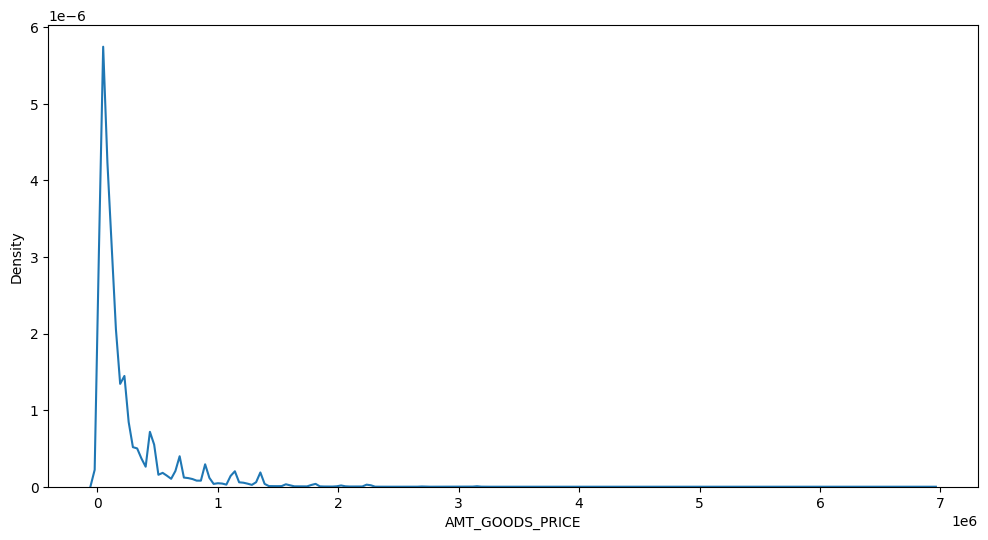

In [42]:
# Plotting kde plot for "AMT_GOODS_PRICE" to understand the distribution

plt.figure(figsize=(12,6))
sns.kdeplot(prev_appl['AMT_GOODS_PRICE'])
plt.show()

* **There are several peaks along the distribution. Let's impute using the mode, mean and median and see if the distribution is still about the same.**

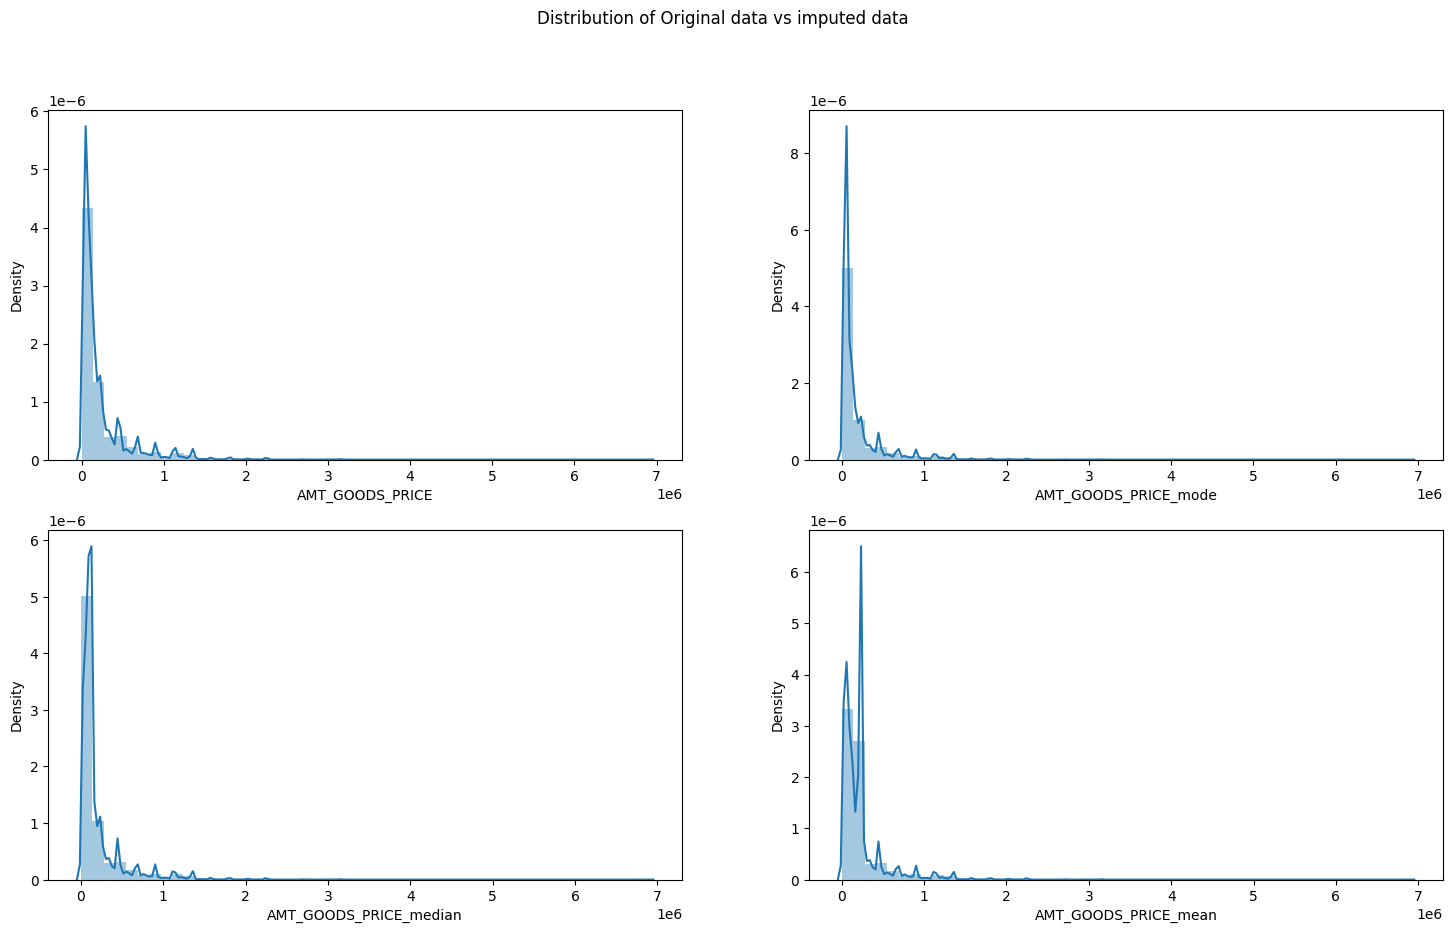

In [43]:
# Creating new dataframe for "AMT_GOODS_PRICE" with columns imputed with mode, median and mean

statsDF = pd.DataFrame()
statsDF['AMT_GOODS_PRICE_mode'] = prev_appl['AMT_GOODS_PRICE'].fillna(prev_appl['AMT_GOODS_PRICE'].mode()[0])
statsDF['AMT_GOODS_PRICE_median'] = prev_appl['AMT_GOODS_PRICE'].fillna(prev_appl['AMT_GOODS_PRICE'].median())
statsDF['AMT_GOODS_PRICE_mean'] = prev_appl['AMT_GOODS_PRICE'].fillna(prev_appl['AMT_GOODS_PRICE'].mean())

cols = ['AMT_GOODS_PRICE_mode', 'AMT_GOODS_PRICE_median','AMT_GOODS_PRICE_mean']

plt.figure(figsize=(18,10))
plt.suptitle('Distribution of Original data vs imputed data')
plt.subplot(221)
sns.distplot(prev_appl['AMT_GOODS_PRICE'][pd.notnull(prev_appl['AMT_GOODS_PRICE'])]);
for i in enumerate(cols):
    plt.subplot(2,2,i[0]+2)
    sns.distplot(statsDF[i[1]])


* **The original distribution is closer with the distribution of data imputed with mode in this case, thus will impute mode for missing values**

In [44]:
# Imputing null values with mode

prev_appl['AMT_GOODS_PRICE'].fillna(prev_appl['AMT_GOODS_PRICE'].mode()[0], inplace=True)

#### Imputing CNT_PAYMENT with 0 as the NAME_CONTRACT_STATUS for these indicate that most of these loans were not started:

In [45]:
#taking out values count for NAME_CONTRACT_STATUS categories where CNT_PAYMENT have null values.

prev_appl.loc[prev_appl['CNT_PAYMENT'].isnull(),'NAME_CONTRACT_STATUS'].value_counts()

Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
Name: NAME_CONTRACT_STATUS, dtype: int64

In [46]:
#imputing null values as 0

prev_appl['CNT_PAYMENT'].fillna(0,inplace = True)

In [47]:
prev_appl.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL', 'YEARLY_DECISION'], dtype='object')

In [48]:
#Converting required categoical columns from Object to categorical

prev_catgorical_col = ['NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE',
                    'CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PORTFOLIO',
                   'NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','PRODUCT_COMBINATION',
                    'NAME_CONTRACT_TYPE']

for col in prev_catgorical_col:
    prev_appl[col] =pd.Categorical(prev_appl[col])

## Finding outliers

In [49]:
prev_appl.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670213e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.490651e+04,1.752339e+05,1.961140e+05,1.856429e+05,8.806797e+02,3.139511e+02,1.247621e+01,342340.056543,15949.224065,35163.363265,78152.730207,83505.775017,0.332570
std,5.325980e+05,1.028148e+05,1.317751e+04,2.927798e+05,3.185746e+05,2.871413e+05,7.790997e+02,7.127443e+03,1.447588e+01,88413.495220,72007.270877,106405.950190,148833.342466,152484.418802,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,1.461857e+06,1.893290e+05,7.547096e+03,1.872000e+04,2.416050e+04,4.500000e+04,2.800000e+02,-1.000000e+00,0.000000e+00,365243.000000,475.000000,257.000000,455.000000,447.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,7.105050e+04,5.810000e+02,3.000000e+00,1.000000e+01,365243.000000,921.000000,741.000000,1155.000000,1171.000000,0.000000
75%,2.384280e+06,3.675140e+05,1.682403e+04,1.803600e+05,2.164185e+05,1.804050e+05,1.300000e+03,8.200000e+01,1.600000e+01,365243.000000,1825.000000,1735.000000,2418.000000,2501.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,6.905160e+06,2.922000e+03,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


* **From above, we could find all the columns those wo have high difference between max and 75 percentile and the ones which makes no sense having max value to be so high are captured below**

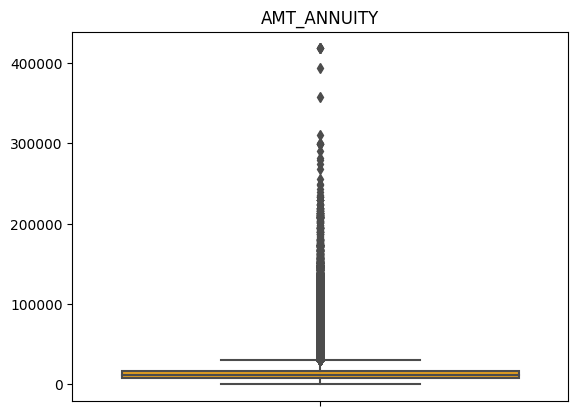

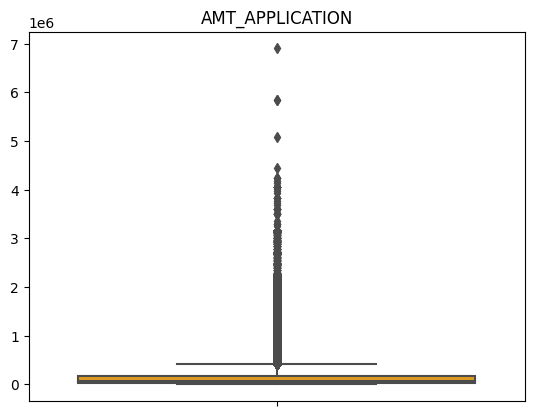

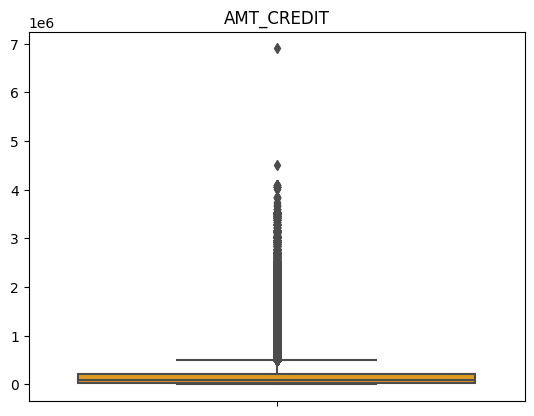

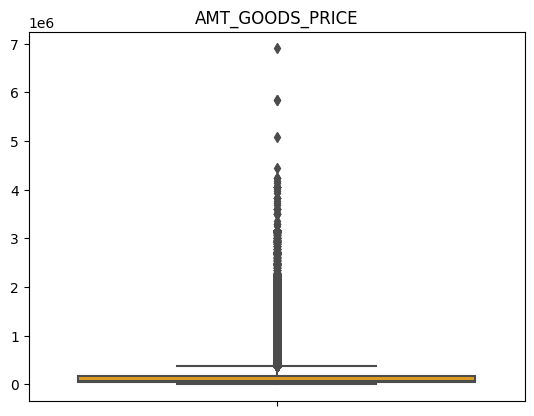

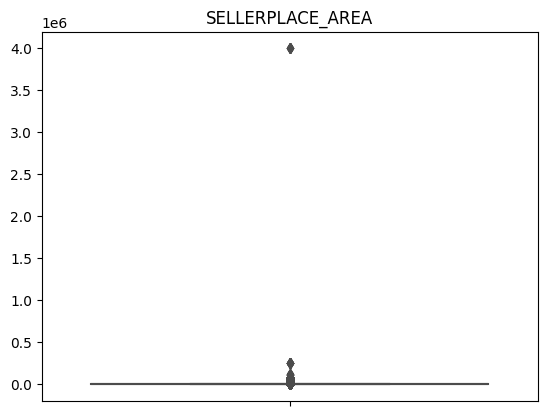

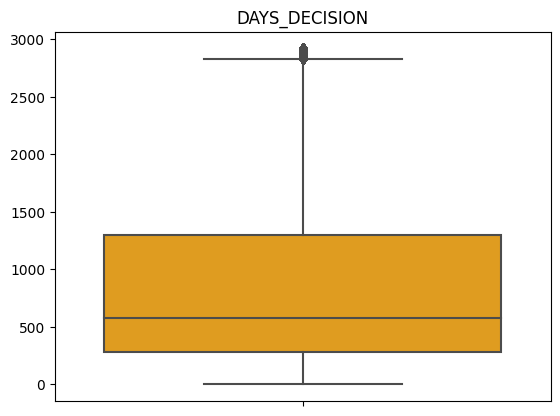

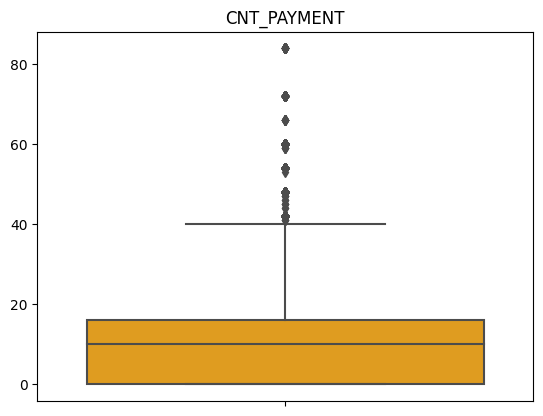

In [58]:
p_outlier_col = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE',
                 'SELLERPLACE_AREA','DAYS_DECISION','CNT_PAYMENT']



#plt.figure(figsize=(8,8))
for i in p_outlier_col:
    sns.boxplot(y = prev_appl[i], orient = "h", color = "orange")
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)
    plt.show()

**Insight:**

**It can be seen that in previous application data**
* **AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE, SELLERPLACE_AREA have huge number of outliers.**
* **CNT_PAYMENT has few outlier values.**
* **DAYS_DECISION has little number of outliers indicating that these previous applications decisions were taken long back.**

## Data Analysis Time

Strategy:
The data analysis flow has been planned in following way :

* Imbalance in Data
* Categorical Data Analysis
* Categorical segmented Univariate Analysis
* Categorical Bi/Multivariate analysis
* Numeric Data Analysis
* Bi-furcation of databased based on TARGET data
* Correlation Matrix
* Numerical segmented Univariate Analysis
* Numerical Bi/Multivariate analysis

### Imbalance Data

In [ ]:
plt.figure(figsize= [14,5])
sns.barplot(y=["Repayer","Defaulter"], x = appl_data["TARGET"].value_counts(), palette = ["blue","r"],orient="h")
plt.ylabel("Loan Repayment Status",fontdict = {"fontsize":15})
plt.xlabel("Count",fontdict = {"fontsize":15})
plt.title("Imbalance Plotting (Repayer Vs Defaulter)", fontdict = {"fontsize":25}, pad = 20)
plt.show()

In [ ]:
#Ratio of imbalance percentage with respect to defaulter and repayer is given below
repayer = round((appl_data["TARGET"].value_counts()[0]/len(appl_data)* 100),2)
print("Repayer Percentage is {}%".format(repayer))
defaluter = round((appl_data["TARGET"].value_counts()[1]/len(appl_data)* 100),2)
print("Defaulter Percentage is {}%".format(defaluter))
print("Imbalance Ratio with respect to Repayer and Defaulter is given: {0:.2f}/1 (approx)".format(repayer/defaluter))

#### Plotting Functions for Univariate

In [ ]:
#Creating a function for plotting Variables to do univariate analysis.
#This function will create two plots
#1. Count plot of given column w.r.t TARGET column
#2. Percentage of defaulters within that column

#The function is taking 6 arguments
#1. dataset : to put the dataset we want to use
#2. col : column name for which we need to the analysis
#3. target_col : column name for with which we will be comparing
#4. ylog : to have y-axis in log10 terms, in case the plot is not readable
#5. x_label_angle : to maintain the orientation of x-axis labels
#6. h_layout : to give horizontal layout of the subplots


# Creating a function to find if the column is categorical or numerical

def data_type(dataset,col):
    if dataset[col].dtype == np.int64 or dataset[col].dtype == np.float64:
        return "numerical"
    if dataset[col].dtype == "category":
        return "categorical"

# Creating a function "univariate" to perform analysis one single variable with respect to target variable

def univariate(dataset,col,target_col,ylog=False,x_label_angle=False,h_layout=True):
    if data_type(dataset,col) == "numerical":
        sns.distplot(dataset[col],hist=False)


    elif data_type(dataset,col) == "categorical":
        val_count = dataset[col].value_counts()
        df1 = pd.DataFrame({col: val_count.index,'count': val_count.values})


        target_1_percentage = dataset[[col, target_col]].groupby([col],as_index=False).mean()
        target_1_percentage[target_col] = target_1_percentage[target_col]*100
        target_1_percentage.sort_values(by=target_col,inplace = True)


# If the plot is not readable, use the log scale

        if(h_layout):
            fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,7))
        else:
            fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(25,35))


# 1. Subplot 1: Count plot of the column

        s = sns.countplot(ax=ax1, x=col, data=dataset, hue=target_col)
        ax1.set_title(col, fontsize = 20)
        ax1.legend(['Repayer','Defaulter'])
        ax1.set_xlabel(col,fontdict={'fontsize' : 15, 'fontweight' : 3})

        if(x_label_angle):
            s.set_xticklabels(s.get_xticklabels(),rotation=75)

# 2. Subplot 2: Percentage of defaulters within the column

        s = sns.barplot(ax=ax2, x = col, y=target_col, data=target_1_percentage)
        ax2.set_title("Defaulters % in "+col, fontsize = 20)
        ax2.set_xlabel(col,fontdict={'fontsize' : 15, 'fontweight' : 3})
        ax2.set_ylabel(target_col,fontdict={'fontsize' : 15, 'fontweight' : 3})

        if(x_label_angle):
            s.set_xticklabels(s.get_xticklabels(),rotation=75)


# If the plot is not readable, use the log scale

        if ylog:
            ax1.set_yscale('log')
            ax1.set_ylabel("Count (log)",fontdict={'fontsize' : 15, 'fontweight' : 3})
        else:
            ax1.set_ylabel("Count",fontdict={'fontsize' : 15, 'fontweight' : 3})


        plt.show()

#### Function for Bivariate

In [ ]:
# function for plotting repetitive rel plots in bivaritae numerical analysis

def bivariate_n(x,y,df,hue,kind,labels):
    plt.figure(figsize=[15,15])
    sns.relplot(x=x, y=y, data=df, hue=hue,kind=kind,legend = False)
    plt.legend(labels=labels)
    plt.xticks(rotation=45, ha='right')
    plt.show()


In [ ]:
# function for plotting repetitive barplots in bivariate categorical analysis

def bivariate_c(x,y,df,hue,figsize,labels):

    plt.figure(figsize=figsize)
    sns.barplot(x=x,y=y,data=df, hue=hue)

    # Defining aesthetics of Labels and Title of the plot using style dictionaries
    plt.xlabel(x,fontsize = 15)
    plt.ylabel(y,fontsize = 15)
    plt.title(col,fontsize = 20)
    plt.xticks(rotation=45, ha='right')
    plt.legend(labels = labels )
    plt.show()


In [ ]:
#function for plotting repetitive countplots in univariate categorical analysis on the merged df

def univariate_c_merged(col,df,hue,palette,ylog,figsize):
    plt.figure(figsize=figsize)
    ax=sns.countplot(x=col, data=df,hue= hue,palette= palette,order=df[col].value_counts().index)


    if ylog:
        plt.yscale('log')
        plt.ylabel("Count (log)",fontsize=15)
    else:
        plt.ylabel("Count",fontsize=15)

    plt.title(col , fontsize=20)
    plt.legend(loc = "upper right")
    plt.xticks(rotation=45, ha='right')

    plt.show()

In [ ]:
# Function to plot point plots

def pointplot(df,hue,x,y):
    plt.figure(figsize=(12,6))
    sns.pointplot(x=x, y=y, hue=hue, data=df)
    plt.title(x+" VS "+y,fontsize = 15)

In [ ]:
# storing numnercial and categorical columns as list in belows varibles

cat_col = list(appl_data.select_dtypes(["category"]).columns)   # Categorical columns list
num_col = list(appl_data.select_dtypes(["int","float"]).columns)  #N Numerical Column list

## Categorical Variables Analysis

### Segmented Univariate Analysis

In [ ]:
#1 Checking the contract type based on loan repayment status
univariate(appl_data,"NAME_CONTRACT_TYPE","TARGET",False,False,True)

**Inferences: Contract type**
* **Revolving loans are just a small fraction (10%) from the total number of loans**
* **Around 8-9% Cash loan applicants and 5-6% Revolving loan applicant are in defaulters**

In [ ]:
#2 Checking the type of Gender on loan repayment status
univariate(appl_data,"CODE_GENDER","TARGET",True,False,True)

**Inferences: Gender Type**
* **The number of female clients is almost double the number of male clients.**
* **Based on the percentage of defaulted credits, males have a higher chance of not returning their loans about 10%, comparing with women about 7%**

In [ ]:
#3 Checking if owning a real estate is related to loan repayment status
univariate(appl_data,"FLAG_OWN_REALTY","TARGET",False,False,True)

**Inferences:**
* **The clients who own real estate are more than double of the ones that don't own.**
* **The defaulting rate of both categories are around the same (~8%). Thus we can infer that there is no correlation between owning a reality and defaulting the loan.**

In [ ]:
#4 Analyzing Housing Type based on loan repayment status
univariate(appl_data,"NAME_HOUSING_TYPE","TARGET",True,True,True)

**Inferences: Applicant House type**
* **Majority of people live in House/apartment**
* **People living in office apartments have lowest default rate**
* **People living with parents (~11.5%) and living in rented apartments(>12%) have higher probability of defaulting**

In [ ]:
#5 Analyzing Family status based on loan repayment status
univariate(appl_data,"NAME_FAMILY_STATUS","TARGET",True,True,True)

**Inferences:**
* **Most of the people who have taken loan are married, followed by Single/not married and civil marriage**
* **In Percentage of defaulters, Civil marriage has the highest percent around (10%) and widow has the lowest around 6% (exception being Unknown).**

In [ ]:
#6 Analyzing Education Type based on loan repayment status
univariate(appl_data,"NAME_EDUCATION_TYPE","TARGET",True,True,True)

**Inferences: Education Type**
* **Majority of clients have Secondary/secondary special education, followed by clients with Higher education.**
* **Very few clients have an academic degree**
* **Lower secondary category have highest rate of defaulting around 11%.**
* **People with Academic degree are least likely to default.**

In [ ]:
#7 Analyzing Income Type based on loan repayment status
univariate(appl_data,"NAME_INCOME_TYPE","TARGET",True,True,True)

**Inferences:**
* **Most of applicants for loans income type is Working, followed by Commercial associate, Pensioner and State servant.**
* **The applicants who are on Maternity leave have defaulting percentage of 40% which is the highest, followed by Unemployed (37%). The rest under average around 10% defaultees.**
* **Student and Businessmen though less in numbers, do not have default record. Safest two categories for providing loan.**

In [ ]:
#8 Analyzing Region rating where applicant lives based on loan repayment status
univariate(appl_data,"REGION_RATING_CLIENT","TARGET",True,False,True)

**Inferences:Client Region Rating**
* **Most of the applicants are living in Region with Rating 2 place.**
* **Region Rating 3 has the highest default rate (11%)**
* **Applicant living in Region_Rating 1 has the lowest probability of defaulting, thus safer for approving loans**

In [ ]:
#9 Analyzing Occupation Type where applicant lives based on loan repayment status
univariate(appl_data,"OCCUPATION_TYPE","TARGET",True,True,False)

**Inferences:**
* **Most of the loans are taken by Laborers, followed by Sales staff.**
* **IT staff are less likely to apply for Loan.**
* **Category with highest percent of defautess are Low-skill Laborers (above 17%), followed by Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff**

In [ ]:
#10 Checking Loan repayment status based on Organization type

univariate(appl_data,"ORGANIZATION_TYPE","TARGET",True,True,False)

**Inferences: Organization Type**
* **Organizations with highest percent of defaultess are Transport: type 3 (16%), Industry: type 13 (13.5%), Industry: type 8 (12.5%) and Restaurant (less than 12%).**
* **Self employed people have relative high defaulting rate,to be safer side loan disbursement should be avoided or provide loan with higher interest rate to mitigate the risk of defaulting.**
* **Most of the people application for loan are from Business Entity Type 3**
* **For a very high number of applications, Organization type information is unavailable(XNA)**
* **It can be seen that following category of organization type has lesser defaulters thus safer for providing loans: Trade Type 4 and 5, Industry type 8**

In [ ]:
#11 Analyzing Employment_Year based on loan repayment status
univariate(appl_data,"EMPLOYEMENT_YEARS","TARGET",True,False,True)

**Inferences: Employment in Years**
* **Majority of the applicants having working experience between 0-5 years are defaultees. The defaulting rating of this group is also the highest which is around 10%**
* **With increase of employment year, defaulting rate is radually decreasing.**
* **with people having 40+ year experience have less than 1% default rate**

In [ ]:
#12 Analyzing Amount_Credit based on loan repayment status

univariate(appl_data,"AMT_CREDIT_RANGE","TARGET",False,True,True)

**Inferences: Loan Amount**
* **there are high number of applicants have loan in range of 2-3 Lakhs followed by 10 Lakh above range**
* **People who get loan for 3-6 Lakhs have most number of defaulters than other loan range.**

In [ ]:
#13  Analyzing Amount_Income Range based on loan repayment status

univariate(appl_data,"AMT_INCOME_RANGE","TARGET",False,True,True)

**Inferences: Applicant Income**
* **Majority of the applications have Income total less than 3 Lakhs.**
* **Application with Income less than 3 Lakhs has high probability of defaulting**
* **Applicant with Income 7-8 Lakhas are less likely to default.**

In [ ]:
#14  Analyzing Number of children based on loan repayment status

univariate(appl_data,"CNT_CHILDREN","TARGET",True,False,True)

**Inferences: Client Children's Count**
* **Most of the applicants do not have children**
* **Very few clients have more than 3 children.**
* **Client who have more than 4 children has a very high default rate with child count 9 and 11 showing 100% default rate**

In [ ]:
#15 Analyzing Number of family members based on loan repayment status
univariate(appl_data,"CNT_FAM_MEMBERS","TARGET",True,True,True)

**Inferences: Family Memembers Count**
* **Family member follows the same trend as children where having more family members increases the risk of defaulting**

### Categorical Bivariate or Multivariate Analysis

In [ ]:
appl_data.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].describe()

In [ ]:
# Income type vs Income Amount Range on a Seaborn Barplot
bivariate_c("NAME_INCOME_TYPE","AMT_INCOME_TOTAL",appl_data,"TARGET",(18,8),['Repayer','Defaulter'])

**Inferences:**
* **It can be seen that Businessman income is the highest and the estimated range with default 95% confidence level seem to indicate that the income of a Businessman could be in the range of slightly close to 4 lakhs and slightly above 10 lakhs**

### Numeric Variables Analysis

**Bisecting the app_data dataframe based on Target value 0 and 1 for correlation and other analysis**

In [ ]:
#Listing all the columnns of dataframe "appl_data"
appl_data.columns

In [ ]:
# bisecting the app_data dataframe based on Target value 0 and 1 for correlation and other analysis

cols_for_correlation = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY',
                        'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
                        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                        'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
                        'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
                        'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
                        'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
                        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
                        'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3',
                        'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


# Repayers dataframe
Repayer_df = appl_data.loc[appl_data['TARGET']==0, cols_for_correlation]

# Defaulters dataframe
Defaulter_df = appl_data.loc[appl_data['TARGET']==1, cols_for_correlation]

In [ ]:
len(cols_for_correlation)

**Correlation between numeric variable**

In [ ]:
# Getting  top 10 correlation for the Repayers dataframe

corr_repayer = Repayer_df.corr()
corr_df_repayer = corr_repayer.where(np.triu(np.ones(corr_repayer.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df_repayer.columns =['VAR1','VAR2','Correlation']
corr_df_repayer.dropna(subset = ["Correlation"], inplace = True)
corr_df_repayer["Correlation"]=corr_df_repayer["Correlation"].abs()
corr_df_repayer.sort_values(by='Correlation', ascending=False, inplace=True)
corr_df_repayer.head(10)

In [ ]:
#plotting heatmap to see linear correlation amoung Repayers

fig = plt.figure(figsize=(20,15))
ax = sns.heatmap(Repayer_df.corr(), cmap="RdYlGn",annot=True,linewidth =1)

**Inferences:**
**Correlating factors amongst repayers**

**1. Credit amount is highly correlated with:**
* **Goods Price Amount**
* **Loan Annuity**
* **Total Income**

**2. We can also see that repayers have high correlation in number of days employed.**

In [ ]:
# Getting the top 10 correlation for the Defaulter data
corr_Defaulter = Defaulter_df.corr()
corr_Defaulter = corr_Defaulter.where(np.triu(np.ones(corr_Defaulter.shape),k=1).astype(np.bool))
corr_df_Defaulter = corr_Defaulter.unstack().reset_index()
corr_df_Defaulter.columns =['VAR1','VAR2','Correlation']
corr_df_Defaulter.dropna(subset = ["Correlation"], inplace = True)
corr_df_Defaulter["Correlation"]=corr_df_Defaulter["Correlation"].abs()
corr_df_Defaulter.sort_values(by='Correlation', ascending=False, inplace=True)
corr_df_Defaulter.head(10)

In [ ]:
fig = plt.figure(figsize=(20,15))
ax = sns.heatmap(Defaulter_df.corr(), cmap="RdYlGn",annot=True,linewidth =1)

**Inferences: Correlating factors amongst repayers**
* **Credit amount is highly correlated with good price amount which is same as repayers.**
* **Loan annuity correlation with credit amount has slightly reduced in defaulters(0.75) when compared to repayers(0.77)**
* **We can also see that repayers have high correlation in number of days employed(0.62) when compared to defaulters(0.58).**
* **There is a severe drop in the correlation between total income of the client and the credit amount(0.038) amongst defaulters whereas it is 0.342 among repayers.**
* **Days_birth and number of children correlation has reduced to 0.259 in defaulters when compared to 0.337 in repayers.**
* **There is a slight increase in defaulted to observed count in social circle among defaulters(0.264) when compared to repayers(0.254)**

### Numerical Univariate Analysis

In [ ]:
# Plotting the numerical columns related to amount as distribution plot to see density
amount = appl_data[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']]

fig = plt.figure(figsize=(16,12))

for i in enumerate(amount):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(Defaulter_df[i[1]], hist=False,label ="Defaulter")
    sns.distplot(Repayer_df[i[1]], hist=False, label ="Repayer")
    plt.title(i[1], fontdict={'fontsize' : 15, 'fontweight' : 5})
    plt.legend()


plt.show()

**Inferences:**
* **Most no of loans are given for goods price below 10 lakhs**
* **Most people pay annuity below 50K for the credit loan**
* **Credit amount of the loan is mostly less then 10 lakhs**
* **The repayers and defaulters distribution overlap in all the plots and hence we cannot use any of these variables in isolation to make a decision**

### Numerical Bivariate Analysis

In [ ]:
# Checking the relationship between Goods price and credit and comparing with loan repayment staus
bivariate_n('AMT_GOODS_PRICE','AMT_CREDIT',appl_data,"TARGET", "line",['Repayer','Defaulter'])

**Inferences:**
* **When the credit amount goes beyond 30 Lakhs, there is an increase in defaulters.**

In [ ]:
# Plotting pairplot between amount variable to draw reference against loan repayment status

amount = appl_data[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE','TARGET']]
amount = amount[(amount["AMT_GOODS_PRICE"].notnull()) & (amount["AMT_ANNUITY"].notnull())]

ax= sns.pairplot(amount,hue="TARGET",palette=["b","r"])
ax.fig.legend(labels=['Defaulter','Repayer'])
plt.show()

**Inferences:**
* **When Annuity Amount > 15K and Good Price Amount > 20 Lakhs, there is a lesser chance of defaulters**
* **Loan Amount(AMT_CREDIT) and Goods price(AMT_GOODS_PRICE) are highly correlated as based on the scatterplot where most of the data are consolidated in form of a line**
* **There are very less defaulters for AMT_CREDIT >20 Lakhs**

## Merged Dataframes Analysis

In [ ]:
# merge both the dataframe on SK_ID_CURR with Inner Joins
loan_df = pd.merge(appl_data, prev_appl, how='inner', on='SK_ID_CURR')
loan_df.head()

In [ ]:
#Checking the details of the merged dataframe
loan_df.shape

In [ ]:
# checking the columns and column types of the dataframe
loan_df.info()

In [ ]:
# Bisecting the "loan_df" dataframe based on Target value 0 and 1 for correlation and other analysis

L0 = loan_df[loan_df['TARGET']==0] # Repayers
L1 = loan_df[loan_df['TARGET']==1] # Defaulters

#### **Plotting Contract Status vs purpose of the loan**

In [ ]:
univariate_c_merged("NAME_CASH_LOAN_PURPOSE",L0,"NAME_CONTRACT_STATUS",["#295939","#e40017","#64dfdf","#fff600"],True,(18,7))

In [ ]:
univariate_c_merged("NAME_CASH_LOAN_PURPOSE",L1,"NAME_CONTRACT_STATUS",["#295939","#e40017","#64dfdf","#fff600"],True,(18,7))

**Inferences:**
* **Loan purpose has high number of unknown values (XAP, XNA)**
* **Loan taken for the purpose of Repairs looks to have highest default rate**
* **Huge number application have been rejected by bank or refused by client which are applied for Repair or Other. from this we can infer that repair is considered high risk by bank. Also, either they are rejected or bank offers loan on high interest rate which is not feasible by the clients and they refuse the loan.**

In [ ]:
# Checking Contract Status based on loan repayment status whether there is any business loss or financial loss

univariate_c_merged("NAME_CONTRACT_STATUS",loan_df,"TARGET",['g','r'],False,(14,8))
r = loan_df.groupby("NAME_CONTRACT_STATUS")["TARGET"]
df1 = pd.concat([r.value_counts(),round(r.value_counts(normalize=True).mul(100),2)],axis=1, keys=('Counts','Percentage'))
df1['Percentage'] = df1['Percentage'].astype(str) +"%" # adding percentage symbol in the results for understanding
df1

**Inferences:**
* **90% of the previously cancelled client have actually repayed the loan. Revising the interest rates would increase business opportunity for these clients**
* **88% of the clients who have been previously refused a loan has payed back the loan in current case.**
* **Refusal reason should be recorded for further analysis as these clients could turn into potential repaying customer.**

In [ ]:
# plotting the relationship between income total and contact status

pointplot(loan_df,"TARGET","NAME_CONTRACT_STATUS",'AMT_INCOME_TOTAL')

**Inferences:**
* **The point plot show that the people who have not used offer earlier have defaulted even when there average income is higher than others**

In [ ]:
# plotting the relationship between people who defaulted in last 60 days being in client's social circle and contact status

pointplot(loan_df,"TARGET","NAME_CONTRACT_STATUS",'DEF_60_CNT_SOCIAL_CIRCLE')

**Inferences:**
* **Clients who have average of 0.13 or higher their DEF_60_CNT_SOCIAL_CIRCLE score tend to default more and thus analysing client's social circle could help in disbursment of the loan.**

## Conclusions

### After analysing the datasets, there are few attributes of a client with which the bank would be able to identify if they will repay the loan or not. The analysis is consised as below with the contributing factors and categorization:

### A. Decisive Factor whether an applicant will be Repayer:
1. **NAME_EDUCATION_TYPE: Academic degree has less defaults.**
2. **NAME_INCOME_TYPE: Student and Businessmen have no defaults.**
3. **REGION_RATING_CLIENT: RATING 1 is safer.**
4. **ORGANIZATION_TYPE: Clients with Trade Type 4 and 5 and Industry type 8 have defaulted less than 3%**
5. **DAYS_BIRTH: People above age of 50 have low probability of defaulting**
6. **DAYS_EMPLOYED: Clients with 40+ year experience having less than 1% default rate**
7. **AMT_INCOME_TOTAL:Applicant with Income more than 700,000 are less likely to default**
8. **NAME_CASH_LOAN_PURPOSE: Loans bought for Hobby, Buying garage are being repayed mostly.**
9. **CNT_CHILDREN: People with zero to two children tend to repay the loans.**

### B. Decisive Factor whether an applicant will be Defaulter:
1. **CODE_GENDER: Men are at relatively higher default rate**
2. **NAME_FAMILY_STATUS : People who have civil marriage or who are single default a lot.**
3. **NAME_EDUCATION_TYPE: People with Lower Secondary & Secondary education**
4. **NAME_INCOME_TYPE: Clients who are either at Maternity leave OR Unemployed default a lot.**
5. **REGION_RATING_CLIENT: People who live in Rating 3 has highest defaults.**
6. **OCCUPATION_TYPE: Avoid Low-skill Laborers, Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff as their default rate is huge.**
7. **ORGANIZATION_TYPE: Organizations with highest percent of loans not repaid are Transport: type 3 (16%), Industry: type 13 (13.5%), Industry: type 8 (12.5%) and Restaurant (less than 12%). Self-employed people have relative high defaulting rate, and thus should be avoided to be approved for loan or provide loan with higher interest rate to mitigate the risk of defaulting.**
8. **DAYS_BIRTH: Avoid young people who are in age group of 20-40 as they have higher probability of defaulting**
9. **DAYS_EMPLOYED: People who have less than 5 years of employment have high default rate.**
10. **CNT_CHILDREN & CNT_FAM_MEMBERS: Client who have children equal to or more than 9 default 100% and hence their applications are to be rejected.**
11. **AMT_GOODS_PRICE: When the credit amount goes beyond 3lakhs, there is an increase in defaulters.**

### C. Factors that Loan can be given on Condition of High Interest rate to mitigate any default risk leading to business loss:


1. **NAME_HOUSING_TYPE: High number of loan applications are from the category of people who live in Rented apartments & living with parents and hence offering the loan would mitigate the loss if any of those default.**
2. **AMT_CREDIT: People who get loan for 3-6 Lakhs tend to default more than others and hence having higher interest specifically for this credit range would be ideal.**
3. **AMT_INCOME: Since 90% of the applications have Income total less than 3Lakhs and they have high probability of defaulting, they could be offered loan with higher interest compared to other income category.**
4. **CNT_CHILDREN & CNT_FAM_MEMBERS: Clients who have 4 to 8 children has a very high default rate and hence higher interest should be imposed on their loans.**
5. **NAME_CASH_LOAN_PURPOSE: Loan taken for the purpose of Repairs seems to have highest default rate. A very high number applications have been rejected by bank or refused by client in previous applications as well which has purpose as repair or other. This shows that purpose repair is taken as high risk by bank and either they are rejected, or bank offers very high loan interest rate which is not feasible by the clients, thus they refuse the loan. The same approach could be followed in future as well.**

### D. Suggestions:
* **90% of the previously cancelled client have actually repayed the loan. Record the reason for cancellation which might help the bank to determine and negotiate terms with these repaying customers in future for increase business opportunity.**
* **88% of the clients who were refused by bank for loan earlier have now turned into a repaying client. Hence documenting the reason for rejection could mitigate the business loss and these clients could be contacted for further loans.**